In [34]:
import pandas as pd

# Load the Excel file
file_path = "Person_Data.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Clean and organize the data into a dictionary {Person: Set of Attributes}
df_cleaned = df.drop(columns=["Sno"]).set_index("Person").stack().reset_index(drop=True, level=1)
df_cleaned = df_cleaned.groupby("Person").apply(set)

# Function to compute Jaccard distance
def jaccard_distance(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return 1 - (intersection / union) if union != 0 else 1  # Handle empty sets

# Select two persons for comparison
person1 = "Dad"
person2 = "Dad"

set1 = df_cleaned.get(person1, set())
set2 = df_cleaned.get(person2, set())

# Compute Jaccard distance
jaccard_dist = jaccard_distance(set1, set2)

# Print results
print(f"Attributes of {person1}: {set1}")
print(f"Attributes of {person2}: {set2}")
print(f"Jaccard Distance between {person1} and {person2}: {jaccard_dist:.4f}")



Attributes of Dad: {'Hard working', 'Progressive Mind', 'Holy Person', 'Trustwarthy', 'Honest', 'Emotion less', 'Loyal', 'Caring', 'Self Confidance'}
Attributes of Dad: {'Hard working', 'Progressive Mind', 'Holy Person', 'Trustwarthy', 'Honest', 'Emotion less', 'Loyal', 'Caring', 'Self Confidance'}
Jaccard Distance between Dad and Dad: 0.0000


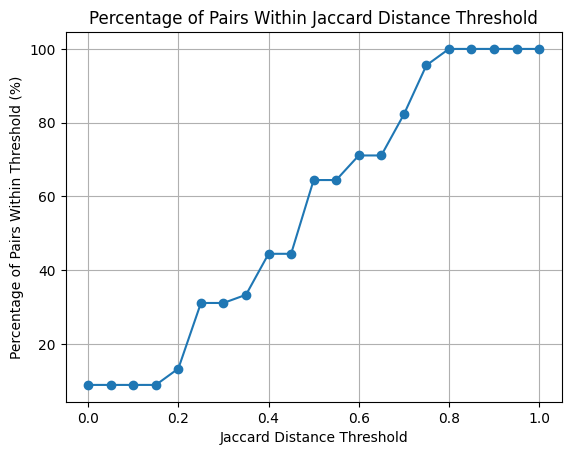

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_score
from itertools import combinations

# Sample binary data (replace with your actual data)
data = np.random.randint(2, size=(10, 5))  # 10 samples, 5 features

# Calculate pairwise Jaccard distances
distances = []
for (i, j) in combinations(range(data.shape[0]), 2):
    dist = 1 - jaccard_score(data[i], data[j])  # Jaccard distance is 1 - Jaccard similarity
    distances.append(dist)

# Define distance thresholds (e.g., from 0 to 1 in steps of 0.05)
thresholds = np.arange(0, 1.05, 0.05)

# Calculate the percentage of pairs within each threshold
percentages = []
for threshold in thresholds:
    count = sum(1 for d in distances if d <= threshold)
    percentage = (count / len(distances)) * 100
    percentages.append(percentage)

# Plot the results
plt.plot(thresholds, percentages, marker='o')
plt.xlabel('Jaccard Distance Threshold')
plt.ylabel('Percentage of Pairs Within Threshold (%)')
plt.title('Percentage of Pairs Within Jaccard Distance Threshold')
plt.grid(True)
plt.show()
